In [1]:
from sklearn import tree
from sklearn import datasets
import pydotplus
import pandas as pn

In [22]:
pwd

'C:\\Users\\jim87\\Desktop\\Colab Notebooks'

In [23]:
data = pn.read_csv('creditcard.csv')

In [24]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# #拆分訓練集與測試集

In [25]:
x_train = data[:21000] #前21000筆作訓練用(70%)
x_test = data[21000:] #21000筆之後作測試資料用(30%)

In [26]:
#設定答案
y_train = x_train.pop('default payment next month')
y_test = x_test.pop('default payment next month')

In [27]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,50000,1,2,1,49,1,2,2,0,0,...,49463,50046,19858,19278,2400,0,2300,1000,1000,1000
20996,230000,1,2,2,38,2,2,2,2,2,...,185074,187053,176805,180826,8000,8000,6500,0,7000,6500
20997,80000,1,2,1,38,0,0,0,0,0,...,16392,7467,6727,994,1631,1432,1000,520,1097,2236
20998,200000,1,2,1,32,-1,-1,0,0,-1,...,91517,72739,389,389,90001,3935,3759,390,390,390


In [28]:
y_train

0        1
1        1
2        0
3        0
4        0
        ..
20995    1
20996    0
20997    0
20998    0
20999    0
Name: default payment next month, Length: 21000, dtype: int64

# #決策樹模型輸出 

In [29]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)

In [30]:
clf.score(x_train,y_train)

0.9994285714285714

In [31]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
clf.score(x_test,y_test)

0.74

# #過度配適初步調整

In [33]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(x_train,y_train)

In [34]:
clf.score(x_train,y_train)

0.8148095238095238

In [35]:
clf.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
clf.score(x_test,y_test)

0.8374444444444444

[Text(167.4, 190.26, 'X[5] <= 1.5\nentropy = 0.775\nsamples = 21000\nvalue = [16204, 4796]'),
 Text(83.7, 135.9, 'X[6] <= 1.5\nentropy = 0.662\nsamples = 18694\nvalue = [15480, 3214]'),
 Text(41.85, 81.53999999999999, 'X[18] <= 1500.5\nentropy = 0.605\nsamples = 17047\nvalue = [14523, 2524]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.737\nsamples = 6472\nvalue = [5129, 1343]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.505\nsamples = 10575\nvalue = [9394, 1181]'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 1.0\nentropy = 0.981\nsamples = 1647\nvalue = [957, 690]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.955\nsamples = 1127\nvalue = [704, 423]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.999\nsamples = 520\nvalue = [253, 267]'),
 Text(251.10000000000002, 135.9, 'X[7] <= -0.5\nentropy = 0.898\nsamples = 2306\nvalue = [724, 1582]'),
 Text(209.25, 81.53999999999999, 'X[20] <= 0.5\nentropy = 0.961\nsamples = 130\nvalue = [80, 50]'),
 Text(188

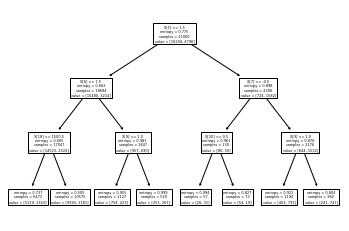

In [37]:
tree.plot_tree(clf)

In [38]:
dot_data = tree.export_graphviz(clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('creditcard_entropy_max3.pdf')

True

In [39]:
df_outer = x_test.join(y_test, how='outer')
df_outer['predict'] = clf.predict(x_test)
df_outer['result'] = (df_outer['default payment next month'] == df_outer['predict'])
df_outer.to_excel("creditcard_entropy_max3.xlsx")  

In [40]:
df_outer

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,predict,result
21000,30000,1,2,1,36,1,-1,-1,-1,0,...,0,780,0,1170,0,0,0,0,0,True
21001,280000,1,3,1,40,2,0,0,0,0,...,192023,10000,9000,8000,6738,6974,7600,1,1,True
21002,260000,1,2,1,37,0,0,0,0,0,...,15797,3203,6015,5055,2011,4078,4522,0,0,True
21003,200000,1,2,2,32,2,0,0,0,-2,...,0,7600,4000,0,0,0,0,1,1,True
21004,80000,1,2,2,32,2,0,0,0,0,...,72928,3000,4005,2500,10000,0,5000,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,True
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,0,True
29997,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,1,True
29998,80000,1,3,1,41,1,-1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,0,False


# #Gini

In [41]:
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=3).fit(x_train,y_train)

In [42]:
clf.score(x_train,y_train)

0.8148095238095238

In [43]:
clf.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
clf.score(x_test,y_test)

0.8374444444444444

[Text(167.4, 190.26, 'X[5] <= 1.5\ngini = 0.352\nsamples = 21000\nvalue = [16204, 4796]'),
 Text(83.7, 135.9, 'X[6] <= 1.5\ngini = 0.285\nsamples = 18694\nvalue = [15480, 3214]'),
 Text(41.85, 81.53999999999999, 'X[18] <= 1500.5\ngini = 0.252\nsamples = 17047\nvalue = [14523, 2524]'),
 Text(20.925, 27.180000000000007, 'gini = 0.329\nsamples = 6472\nvalue = [5129, 1343]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.198\nsamples = 10575\nvalue = [9394, 1181]'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 1.0\ngini = 0.487\nsamples = 1647\nvalue = [957, 690]'),
 Text(104.625, 27.180000000000007, 'gini = 0.469\nsamples = 1127\nvalue = [704, 423]'),
 Text(146.475, 27.180000000000007, 'gini = 0.5\nsamples = 520\nvalue = [253, 267]'),
 Text(251.10000000000002, 135.9, 'X[7] <= -0.5\ngini = 0.431\nsamples = 2306\nvalue = [724, 1582]'),
 Text(209.25, 81.53999999999999, 'X[20] <= 0.5\ngini = 0.473\nsamples = 130\nvalue = [80, 50]'),
 Text(188.32500000000002, 27.180000000000

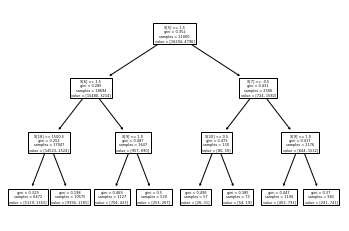

In [45]:
tree.plot_tree(clf)

In [46]:
dot_data = tree.export_graphviz(clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('creditcard_gini_max3.pdf')

True

In [48]:
df_outer = x_test.join(y_test, how='outer')
df_outer['predict'] = clf.predict(x_test)
df_outer['result'] = (df_outer['default payment next month'] == df_outer['predict'])
df_outer.to_excel("creditcard_gini_max3.xlsx")  

In [49]:
df_outer

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,predict,result
21000,30000,1,2,1,36,1,-1,-1,-1,0,...,0,780,0,1170,0,0,0,0,0,True
21001,280000,1,3,1,40,2,0,0,0,0,...,192023,10000,9000,8000,6738,6974,7600,1,1,True
21002,260000,1,2,1,37,0,0,0,0,0,...,15797,3203,6015,5055,2011,4078,4522,0,0,True
21003,200000,1,2,2,32,2,0,0,0,-2,...,0,7600,4000,0,0,0,0,1,1,True
21004,80000,1,2,2,32,2,0,0,0,0,...,72928,3000,4005,2500,10000,0,5000,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,True
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,0,True
29997,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,1,True
29998,80000,1,3,1,41,1,-1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,0,False
